In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [2]:
# Get the data for the Walmart stock from 2020-01-01 to 2024-12-17
data = yf.download('WMT','2020-01-01','2024-12-17')

#save it as a pd dataframe
df = pd.DataFrame(data  )

df.index

#display the first 5 rows
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT
Date,,,,,
2020-01-02,36.782581,37.076371,36.708359,36.757839,20294700
2020-01-03,36.457874,36.736205,36.365100,36.575391,16197600
2020-01-06,36.383640,36.519712,36.111496,36.306325,19336500
2020-01-07,36.046558,36.343441,35.935228,36.263036,20540700
2020-01-08,35.922855,36.099128,35.774414,35.966149,17627400


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT
Date,,,,,
2020-01-02,36.782581,37.076371,36.708359,36.757839,20294700
2020-01-03,36.457874,36.736205,36.365100,36.575391,16197600
2020-01-06,36.383640,36.519712,36.111496,36.306325,19336500
2020-01-07,36.046558,36.343441,35.935228,36.263036,20540700
2020-01-08,35.922855,36.099128,35.774414,35.966149,17627400


<Axes: xlabel='Date'>

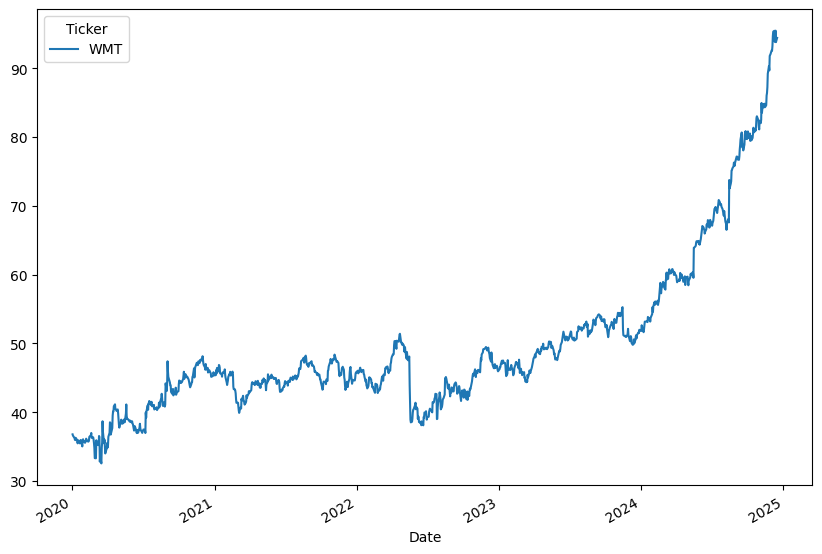

In [4]:
df['Open'].plot(figsize=(10, 7))

In [5]:
#The 7-day rolling mean is calculated by taking the average of the past 7 days.
df.rolling(7).mean().head(20) 

Price,Close,High,Low,Open,Volume
Ticker,WMT,WMT,WMT,WMT,WMT
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN
2020-01-10,36.268334,36.479952,36.094269,36.292191,1.840749e+07
2020-01-13,36.133147,36.332395,35.947154,36.182628,1.812793e+07


<Axes: xlabel='Date'>

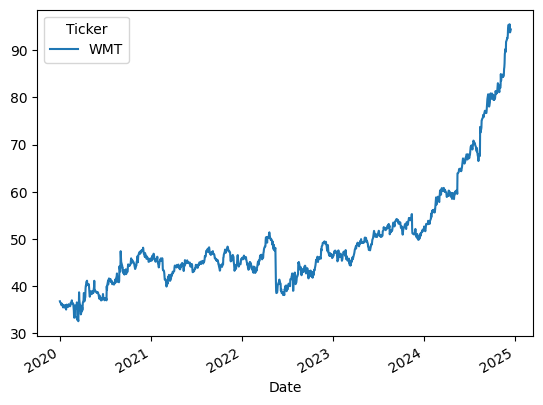

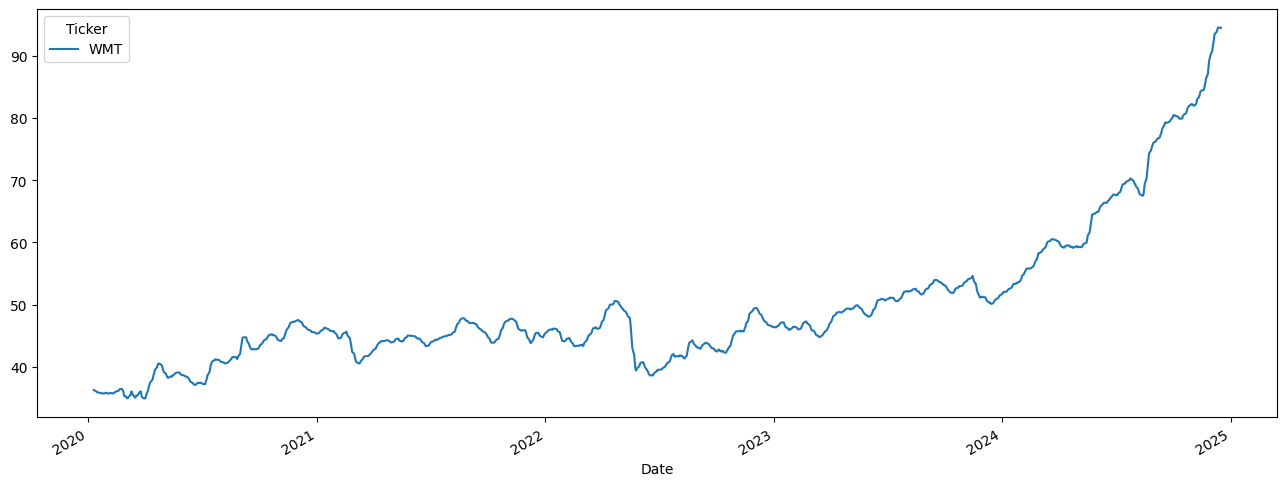

In [11]:
df['Open'].plot()
df.rolling(window=7).mean()['Close'].plot(figsize=(16, 6))


<Axes: xlabel='Date'>

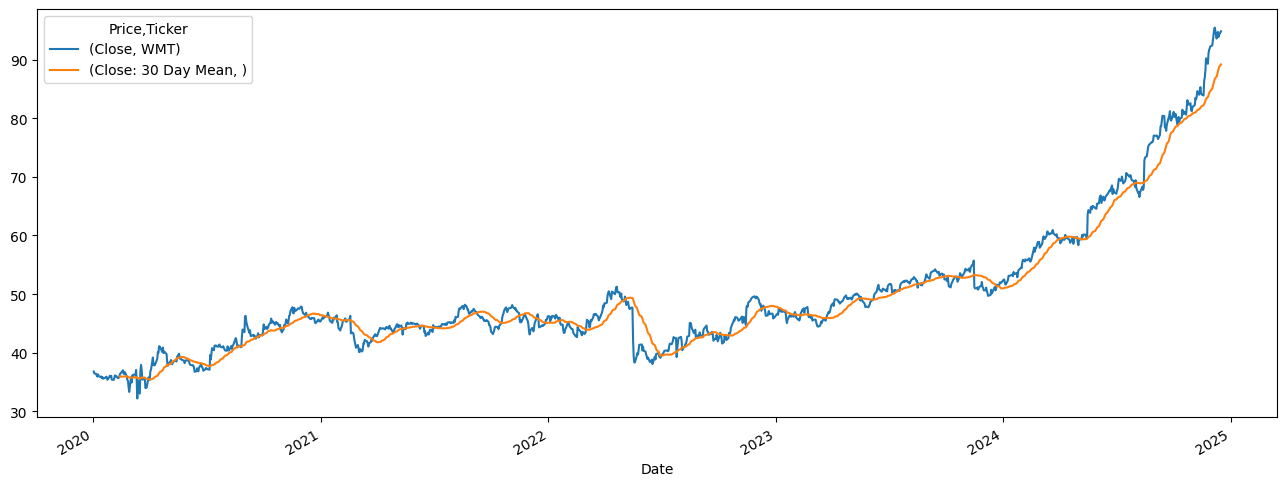

In [12]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(16, 6))

<Axes: xlabel='Date'>

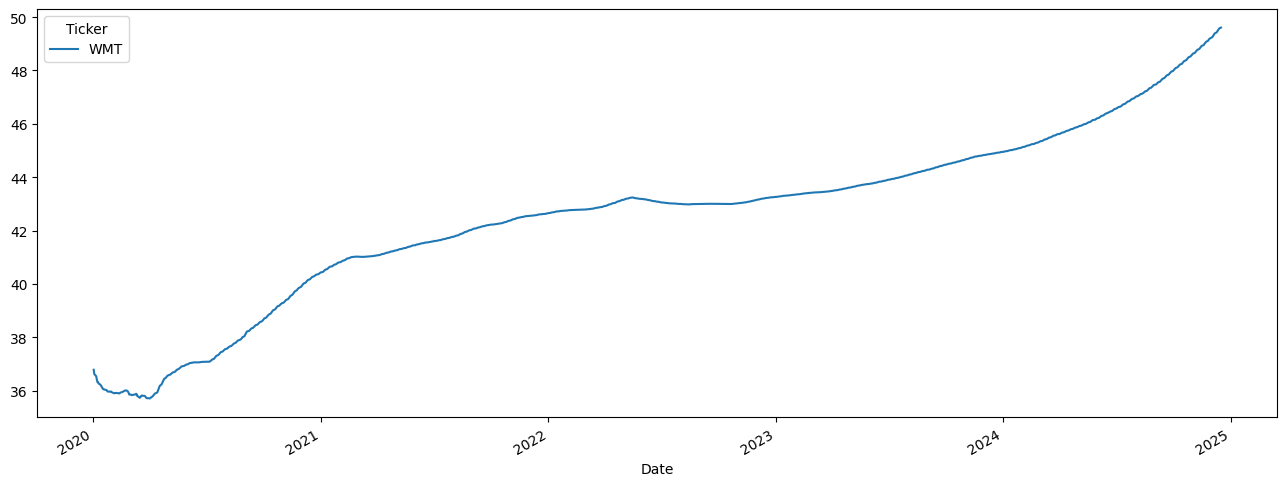

In [13]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16, 6))

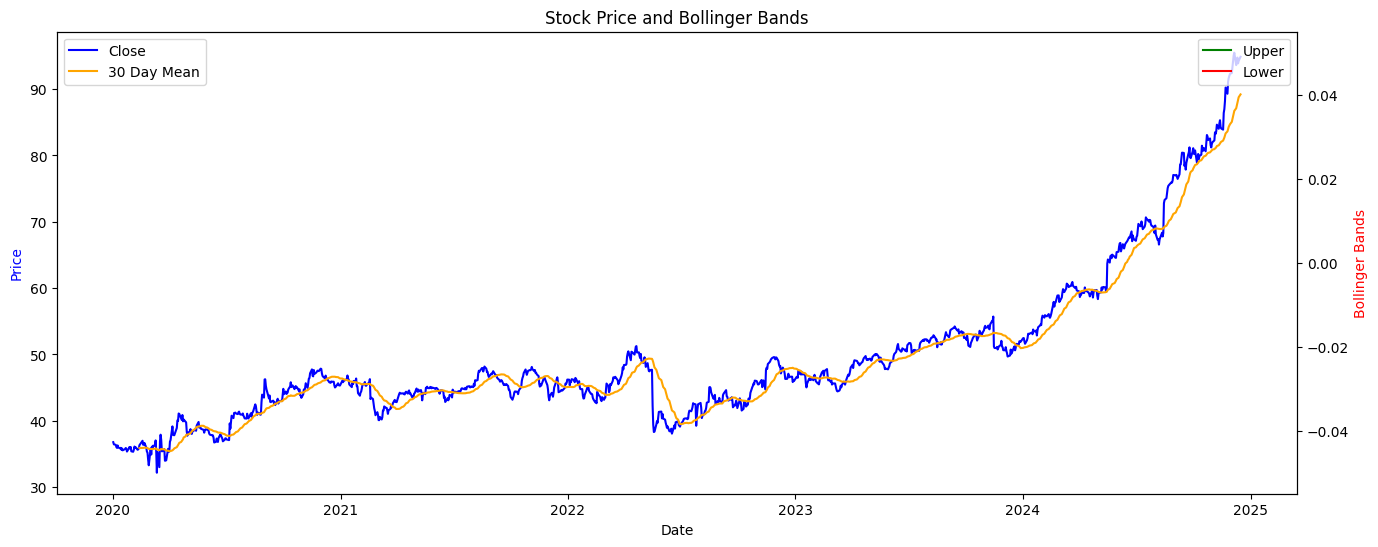

In [18]:
# Calculate the 30-day rolling mean for 'Close'
df['30 Day Mean'] = df['Close'].rolling(30).mean()

# Calculate the 30-day rolling standard deviation for 'Close'
df['30 Day Std'] = df['Close'].rolling(30).std()

# Calculate the Upper Bollinger Band
df['Upper'] = df['30 Day Mean'] + (2 * df['30 Day Std'])

# Calculate the Lower Bollinger Band
df['Lower'] = df['30 Day Mean'] - (2 * df['30 Day Std'])

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot the 'Close' price and '30 Day Mean' on the primary axis
ax1.plot(df['Close'], label='Close', color='blue')
ax1.plot(df['30 Day Mean'], label='30 Day Mean', color='orange')

# Create a secondary y-axis to plot the Bollinger Bands
ax2 = ax1.twinx()
ax2.plot(df['Upper'], label='Upper', color='green')
ax2.plot(df['Lower'], label='Lower', color='red')

# Add labels, title, and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')
ax2.set_ylabel('Bollinger Bands', color='red')

# Title and legend
plt.title('Stock Price and Bollinger Bands')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
